# 1. Imports and Reading csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# my imports, has the cleaning + visualization libraries, as well as some models and some metrics

In [3]:
df = pd.read_csv('data/universities.csv') # reading dataset

# 2. Basic Data Cleaning

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# having no setting for max rows and columns to look at the data with ease

In [8]:
df.info()
# looking at everything using info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

In [15]:
sub = df.dropna()
# dropping the Null values and storing that in the variable

In [18]:
sub.to_csv('data/cleaned_universities.csv')
# making a new csv with the variable from earlier

# 3. Re-reading csv

In [2]:
data = pd.read_csv('data/cleaned_universities.csv')
# reading in the new dataframe from the previous cell

In [4]:
data.head()

,Unnamed: 0,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
2,9,Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
3,11,Huntingdon College,AL,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
4,21,Talladega College,AL,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


# 4. EDA on new csv

In [5]:
data.info()
# showing the info of the new csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                471 non-null    int64  
 1   College Name              471 non-null    object 
 2   State                     471 non-null    object 
 3   Public (1)/ Private (2)   471 non-null    int64  
 4   # appli. rec'd            471 non-null    float64
 5   # appl. accepted          471 non-null    float64
 6   # new stud. enrolled      471 non-null    float64
 7   % new stud. from top 10%  471 non-null    float64
 8   % new stud. from top 25%  471 non-null    float64
 9   # FT undergrad            471 non-null    float64
 10  # PT undergrad            471 non-null    float64
 11  in-state tuition          471 non-null    float64
 12  out-of-state tuition      471 non-null    float64
 13  room                      471 non-null    float64
 14  board     

In [4]:
sns.set_style('darkgrid')

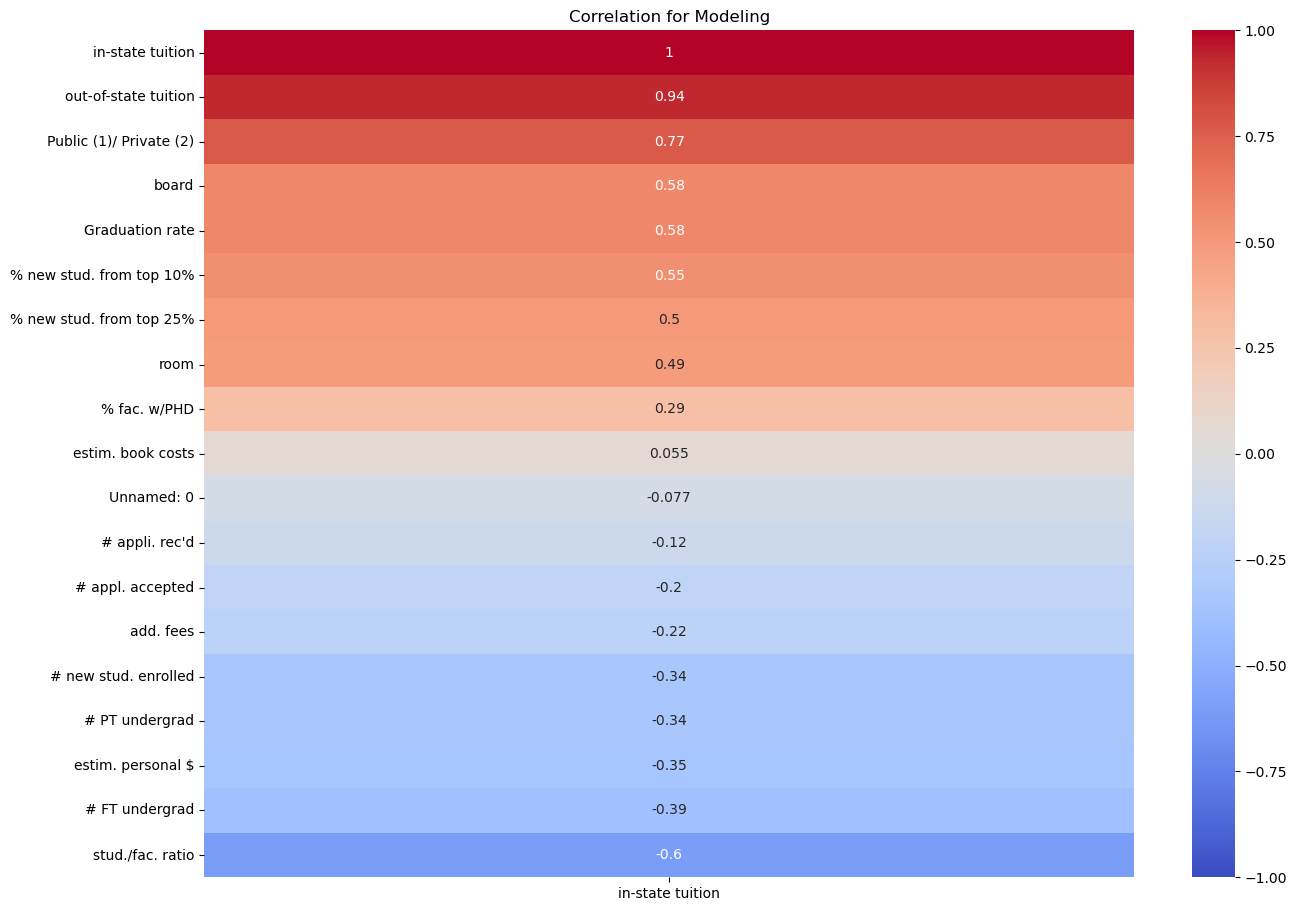

In [4]:
plt.figure(figsize= (15, 11))
sns.heatmap(data.corr(numeric_only= True)[['in-state tuition']].sort_values(by = 'in-state tuition', ascending = False), 
           annot = True, 
           vmin = -1, 
           vmax = 1, 
           cmap = 'coolwarm')
plt.title('Correlation for Modeling')
plt.savefig('Model_Visuals/correlation_of_tuition_and_features.png')
# making a heatmap of the new csv to showcase correlations so that I can make good predictions

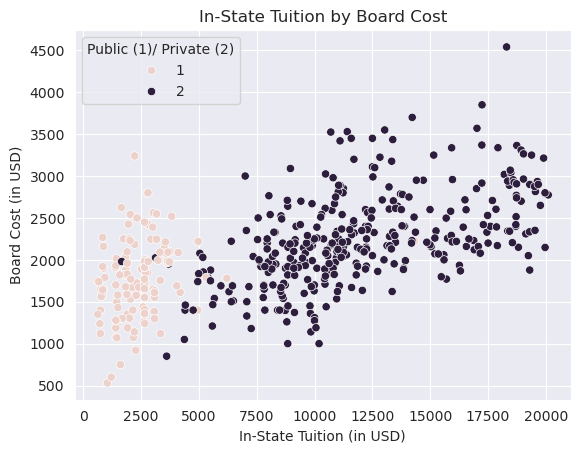

In [6]:
sns.scatterplot(data, x = 'in-state tuition', y = 'board',hue = 'Public (1)/ Private (2)')
plt.title('In-State Tuition by Board Cost')
plt.xlabel('In-State Tuition (in USD)')
plt.ylabel('Board Cost (in USD)')
plt.savefig('Model_Visuals/in_state_tuition_by_board.png')
# scatter plot of in state tuition and board cost, with two groups public or private

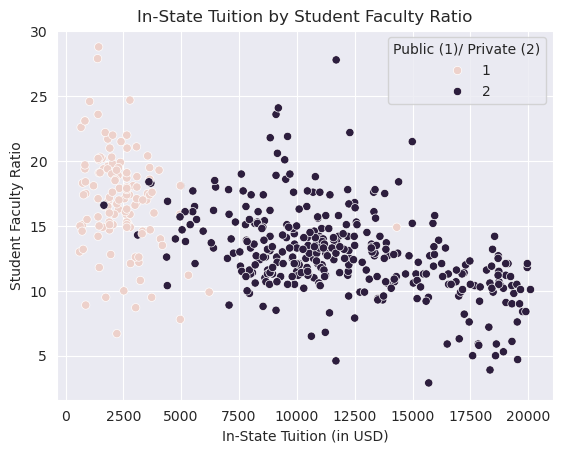

In [8]:
sns.scatterplot(data, x = 'in-state tuition', y = 'stud./fac. ratio',hue = 'Public (1)/ Private (2)')
plt.title('In-State Tuition by Student Faculty Ratio')
plt.xlabel('In-State Tuition (in USD)')
plt.ylabel('Student Faculty Ratio')
plt.savefig('Model_Visuals/in_state_tuition_by_student_faculty_ratio.png')
# scatter plot of in state tuition and student faculty ratio, with two groups, public or private

# 5. Modeling

In [24]:
X = data[['Public (1)/ Private (2)','board','Graduation rate','% new stud. from top 10%','% new stud. from top 25%','room','stud./fac. ratio']] 
# selected these features as they correlated strongly with the in state tuition with out being heavily related/weird for a web app (like out-of-state tuition)
y = data['in-state tuition']
# i just wanted to predict the instate tuition

# > for linear regression

In [93]:
scores = []

for i in range(10, 26, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)

    scores.append({'test_size': i, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

# creating a for loop to look at all of the scores for different test sizes at once

In [94]:
df_scores
# test size 16 seems to be the best

,test_size,train_score,test_score
0,10,0.821763,0.890281
1,11,0.822265,0.883643
2,12,0.821171,0.886373
3,13,0.819904,0.888570
4,14,0.820334,0.883250
5,15,0.819120,0.886200
6,16,0.816279,0.895505
7,17,0.816046,0.892008
8,18,0.813925,0.897396
9,19,0.813470,0.894498


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.16)

lr = LinearRegression()

lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
lr.score(X_test, y_test)

0.8955052817092382

In [105]:
y_pred = lr.predict(X_test)

In [107]:
lr_rmse =root_mean_squared_error(y_test, y_pred)
lr_rmse

1802.6373666725083

In [108]:
baseline_preds = np.full_like(y_test, y_test.mean())
basline_rmse = root_mean_squared_error(y_test, baseline_preds)
basline_rmse

5576.493489754493

In [109]:
mean_absolute_percentage_error(y_test, y_pred)

# seems to be my second best model, thoiugh random forest seems to be marginally better at certain things (like mean absolute ercentage error)

0.26773693366296436

# > for Decission Tree

In [60]:
scores = []

for i in range(10, 26, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    dtr = DecisionTreeRegressor(random_state = 42)
    dtr.fit(X_train, y_train)
    train_score = dtr.score(X_train, y_train)
    test_score = dtr.score(X_test, y_test)
    
    scores.append({'test_size': i, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

# creating a for loop to look at all of the scores for different test sizes at once

In [61]:
df_scores
# test size of 16 percent seems to be the best for this one

,test_size,train_score,test_score
0,10,1.0,0.671006
1,11,1.0,0.694170
2,12,1.0,0.699003
3,13,1.0,0.778918
4,14,1.0,0.742650
5,15,1.0,0.710871
6,16,1.0,0.780508
7,17,1.0,0.740903
8,18,1.0,0.787262
9,19,1.0,0.775485


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.16)

dtr = DecisionTreeRegressor(random_state= 42)

dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [112]:
dtr.score(X_test, y_test)

0.7805084949788672

In [113]:
y_pred = dtr.predict(X_test)

In [114]:
dtr_rmse =root_mean_squared_error(y_test, y_pred)
dtr_rmse

2612.5827662537918

In [115]:
baseline_preds = np.full_like(y_test, y_test.mean())
basline_rmse = root_mean_squared_error(y_test, baseline_preds)
basline_rmse

5576.493489754493

In [116]:
mean_absolute_percentage_error(y_test, y_pred)

# probably my worst model, but I think knn is a close second (horribl mape score on knn)

0.3351244042574794

# > for random forest

In [88]:
scores = []

for i in range(10, 26, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    rfr = RandomForestRegressor(random_state= 42)
    rfr.fit(X_train, y_train)
    train_score = rfr.score(X_train, y_train)
    test_score = rfr.score(X_test, y_test)
    
    scores.append({'test_size': i, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

In [89]:
df_scores
# tyest size 18 percent

,test_size,train_score,test_score
0,10,0.980439,0.856089
1,11,0.981255,0.845798
2,12,0.979075,0.862619
3,13,0.979482,0.877285
4,14,0.979277,0.874355
5,15,0.979302,0.873916
6,16,0.978744,0.884968
7,17,0.979493,0.887197
8,18,0.978125,0.895580
9,19,0.977524,0.892342


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.18)

rfr = RandomForestRegressor(random_state= 42)

rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [118]:
rfr.score(X_test, y_test)

0.8955804965852951

In [119]:
y_pred = rfr.predict(X_test)

In [120]:
rfr_rmse =root_mean_squared_error(y_test, y_pred)
rfr_rmse

1809.5204965215964

In [121]:
baseline_preds = np.full_like(y_test, y_test.mean())
basline_rmse = root_mean_squared_error(y_test, baseline_preds)
basline_rmse

5599.802305136227

In [122]:
mean_absolute_percentage_error(y_test, y_pred)

# the model I chose to pickler, I chose it because its test score is great and its mean absolute percentage error is the best. its rmse seems to be slightly worse than the linrear regression model but only slightly

0.23015779631704192

# Pickling the random forest
#### > decided to pickle this model as I feltt it preformed the best

In [133]:
import pickle

In [134]:
rfr_pkl = ''

In [135]:
with open('rfr_pkl', 'wb') as file:
    model = pickle.dump(rfr, file)

In [136]:
with open('rfr_pkl', 'rb') as file:
    model = pickle.load(file)

# > for KNN regressor

## > scaling

In [70]:
from sklearn.preprocessing import StandardScaler
# importing standard scaler cause I forgot to

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=16)

In [124]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
# scaling my X_train and X_test

In [125]:
scores = []

for k in range(3, 32, 2):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)

    scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

In [126]:
df_scores
# k of 3 + test size of 16 cause it gave a great score

,k,train_score,test_score
0,3,0.909469,0.885672
1,5,0.884693,0.864723
2,7,0.874671,0.885235
3,9,0.869192,0.879262
4,11,0.869070,0.878663
5,13,0.863996,0.869236
6,15,0.860869,0.859304
7,17,0.855187,0.872302
8,19,0.854539,0.872382
9,21,0.852666,0.876899


In [127]:
knn.score(X_test_sc, y_test)

0.8707673097496782

In [129]:
y_pred = knn.predict(X_test_sc)

In [130]:
knn_rmse =root_mean_squared_error(y_test, y_pred)
knn_rmse

1864.0262722607908

In [131]:
baseline_preds = np.full_like(y_test, y_test.mean())
basline_rmse = root_mean_squared_error(y_test, baseline_preds)
basline_rmse

5185.203870976892

In [132]:
mean_absolute_percentage_error(y_test, y_pred)

# second worse model, great r squared and rmse, but horrible mape, probably cause knn makes estimates on how close it is to other points

0.6398990095635926